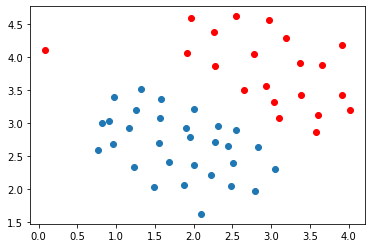

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC

data1 = loadmat('ex6data1.mat')
X1 = data1['X']
y1 = data1['y']

plt.plot(X1[y1.flatten()==1,0], X1[y1.flatten()==1,1], 'ro')
plt.plot(X1[y1.flatten()==0,0], X1[y1.flatten()==0,1], 'o')
plt.show()

In [91]:
def plotDecisionBoundary(clf, X, y):
    plt.plot(X[y.flatten()==1,0], X[y.flatten()==1,1], 'ro')
    plt.plot(X[y.flatten()==0,0], X[y.flatten()==0,1], 'o')
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.show()

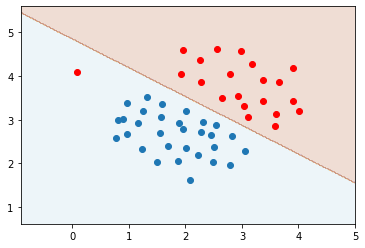

In [92]:
clf1 = SVC(C=1.0, kernel='linear')
clf1.fit(X1, y1.flatten())
plotDecisionBoundary(clf1, X1, y1)

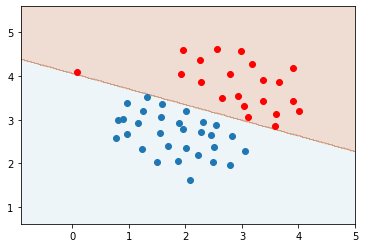

In [93]:
clf1 = SVC(C=100.0, kernel='linear')
clf1.fit(X1, y1.flatten())
plotDecisionBoundary(clf1, X1, y1)

In [94]:
def gaussianKernel(x1, x2, sigma):
    return np.exp((-np.sum((x1 - x2)**2))/(2*sigma**2))

In [95]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

print(gaussianKernel(x1, x2, sigma))

0.32465246735834974


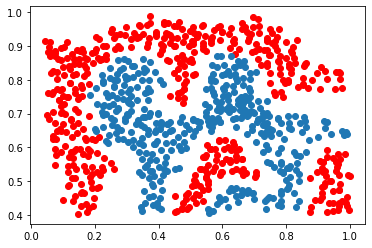

In [96]:
data2 = loadmat('ex6data2.mat')
X2 = data2['X']
y2 = data2['y']

plt.plot(X2[y2.flatten()==1,0], X2[y2.flatten()==1,1], 'ro')
plt.plot(X2[y2.flatten()==0,0], X2[y2.flatten()==0,1], 'o')
plt.show()

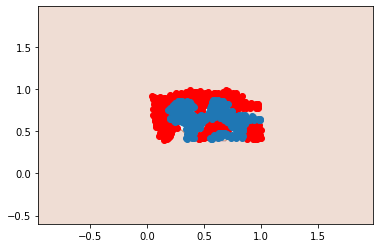

In [97]:
clf2 = SVC(C=50, kernel='rbf', gamma=1)
clf2.fit(X2, y2.flatten())
plotDecisionBoundary(clf2, X2, y2)

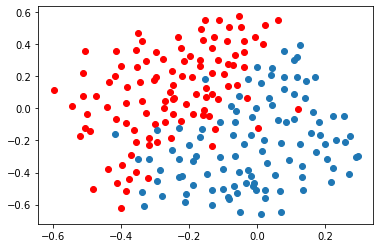

In [98]:
data3 = loadmat('ex6data3.mat')
X3 = data3['X']
y3 = data3['y']
Xval3 = data3['Xval']
yval3 = data3['yval']

plt.plot(X3[y3.flatten()==1,0], X3[y3.flatten()==1,1], 'ro')
plt.plot(X3[y3.flatten()==0,0], X3[y3.flatten()==0,1], 'o')
plt.show()

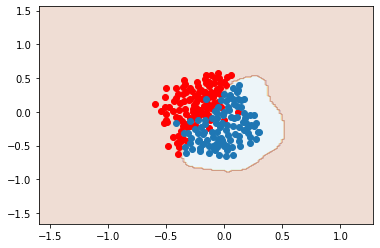

Accuracy of cross validation set : 97.000000


In [99]:
clf3 = SVC(C=0.8, kernel='rbf', gamma=65.6)
clf3.fit(X3, y3.flatten())
plotDecisionBoundary(clf3, X3, y3)
print("Accuracy of cross validation set : %f" %(100*clf3.score(Xval3, yval3)))